<a href="https://colab.research.google.com/github/Chetan3520/TensorFlowDeveloper/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-03-05 05:03:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-03-05 05:03:40 (84.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

#Download a text dataset
Let's start by download a text dataset. We'll be using the Real or Not? dataset from Kaggle which contains text-based Tweets about natural disasters.

The Real Tweets are actually about disasters, for example:

In [3]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2024-03-05 05:03:44--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.207, 173.194.196.207, 173.194.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.003s  

2024-03-05 05:03:45 (180 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [4]:
import pandas as pd
train_df=pd.read_csv("/content/train.csv")
test_df=pd.read_csv("/content/test.csv")

In [5]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
#shuffle our training dataframe
train_df_shuffled=train_df.sample(frac=1,random_state=42);
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [7]:
#what does the test data frame look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
#how many example of the class?
train_df.target.value_counts()   #approximately ballanced

0    4342
1    3271
Name: target, dtype: int64

In [9]:
#shuffle our test dataframe
test_df_shuffled=test_df.sample(frac=1,random_state=42);
test_df_shuffled.head()

,id,keyword,location,text
2406,8051,refugees,NaN,Refugees as citizens - The Hindu http://t.co/G...
134,425,apocalypse,Currently Somewhere On Earth,@5SOStag honestly he could say an apocalypse i...
411,1330,blown%20up,Scout Team,If you bored as shit don't nobody fuck wit you...
203,663,attack,NaN,@RealTwanBrown Yesterday I Had A Heat Attack ?...
889,2930,danger,Leeds,The Devil Wears Prada is still one of my favou...


In [10]:
#Tensorflow Imbalanced classification. how we can use that?

In [11]:
#how many total samples ?
len(train_df),len(test_df)

(7613, 3263)

In [12]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
San Antonio Stars head coach Dan Hughes was just carted to the locker room after one of his guards collided with... http://t.co/4dbhOnO3Rk

---

Target: 0 (not real disaster)
Text:
RT @DianneG: Gunshot wound #9 is in the bicep. only 1 of the 10 wounds that is not in the chest/torso area.  #KerrickTrial #JonathanFerrell

---

Target: 1 (real disaster)
Text:
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam

---

Target: 1 (real disaster)
Text:
#Sinjar Massacre #Yazidis Blast Lack of Action Over Hostages http://t.co/JhOaHpbpQ4 Portland #Phoenix #Newyork #Miami #Atlanta #Casper #Iraq

---

Target: 0 (not real disaster)
Text:
7.Beyonce Is my pick for http://t.co/thoYhrHkfJ Fan Army #Beyhive http://t.co/WvJ39a3BGM

---



#Split data into training and validation sets¶

Since the test set has no labels and we need a way to evalaute our trained models, we'll split off some of the training data and create a validation set.

When our model trains (tries patterns in the Tweet samples), it'll only see data from the training set and we can see how it performs on unseen data using the validation set.

We'll convert our splits from pandas Series datatypes to lists of strings (for the text) and lists of ints (for the labels) for ease of use later.

To split our training dataset and create a validation dataset, we'll use Scikit-Learn's train_test_split() method and dedicate 10% of the training samples to the validation set.

In [13]:
from sklearn.model_selection import train_test_split
#Use train_test_split to split training data into training and validation set
train_sentences,val_sentences,train_labels,val_labels=train_test_split(
    train_df_shuffled["text"].to_numpy(),
    train_df_shuffled["target"].to_numpy(),
    test_size=0.1,
    random_state=42
)

In [14]:
#Check the lengths

len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(6851, 762, 6851, 762)

In [15]:
#view first 10 sentences and thier labels
train_sentences[0:10],train_labels[0:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

#Converting text into numbers

In NLP, there are two main concepts for turning text into numbers:

###Tokenization
- A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization:
* Using word-level tokenization with the sentence "I love TensorFlow" might result in "I" being 0, "love" being 1 and "TensorFlow" being 2. In this case, every word in a sequence considered a single token.
* haracter-level tokenization, such as converting the letters A-Z to values 1-26. In this case, every character in a sequence considered a single token.
* Sub-word tokenization is in between word-level and character-level tokenization. It involves breaking invidual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these sub-words would then be mapped to a numerical value. In this case, every word could be considered multiple tokens.
###Embeddings
 - An embedding is a representation of natural language which can be learned. Representation comes in the form of a feature vector. For example, the word "dance" could be represented by the 5-dimensional vector [-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]. It's important to note here, the size of the feature vector is tuneable. There are two ways to use embeddings:
* Create your own embedding - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as tf.keras.layers.Embedding) and an embedding representation will be learned during model training.
* Reuse a pre-learned embedding - Many pre-trained embeddings exist online. These pre-trained embeddings have often been learned on large corpuses of text (such as all of Wikipedia) and thus have a good underlying representation of natural language. You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.

#Text vectorization (tokenization)
Enough talking about tokenization and embeddings, let's create some.

We'll practice tokenzation (mapping our words to numbers) first.

To tokenize our words, we'll use the helpful preprocessing layer tf.keras.layers.experimental.preprocessing.TextVectorization.

The TextVectorization layer takes the following parameters:

* max_tokens - The maximum number of words in your vocabulary (e.g. 20000 or the number of unique words in your text), includes a value for OOV (out of vocabulary) tokens.
* standardize - Method for standardizing text. Default is "lower_and_strip_punctuation" which lowers text and removes all punctuation marks.
* split - How to split text, default is "whitespace" which splits on spaces.
ngrams - How many words to contain per token split, for example, ngrams=2 splits tokens into continuous sequences of 2.
* output_mode - How to output tokens, can be "int" (integer mapping), "binary" (one-hot encoding), "count" or "tf-idf". See documentation for more.
* output_sequence_length - Length of tokenized sequence to output. For example, if output_sequence_length=150, all tokenized sequences will be 150 tokens long.
* pad_to_max_tokens - Defaults to False, if True, the output feature axis will be padded to max_tokens even if the number of unique tokens in the vocabulary is less than max_tokens. Only valid in certain modes, see docs for more.
Let's see it in action.

In [16]:
# Before TensorFlow 2.6
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

#Use the default TextVectorization variables
text_vectorizer=TextVectorization(max_tokens=None,
                                  standardize="lower_and_strip_punctuation",
                                  split='whitespace',
                                  output_mode='int',
                                  output_sequence_length=None)


We've initialized a TextVectorization object with the default settings but let's customize it a little bit for our own use case.

In particular, let's set values for max_tokens and output_sequence_length.

For max_tokens (the number of words in the vocabulary), multiples of 10,000 (10,000, 20,000, 30,000) or the exact number of unique words in your text (e.g. 32,179) are common values.

For our use case, we'll use 10,000.

And for the output_sequence_length we'll use the average number of tokens per Tweet in the training set. But first, we'll need to find it.

In [18]:
#find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15


Now let's create another TextVectorization object using our custom parameters.

In [19]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [20]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

raining data mapped! Let's try our text_vectorizer on a custom sentence (one similar to what you might see in the training data).

In [21]:
#Create the sample sentence and tokenize it
sample_sentence="There's a food in my street!"

In [22]:
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 260,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [23]:
random_sentence=random.choice(train_sentences)

In [24]:
print(f"Original text:\n{random_sentence})\n\n Vectorized version:")
text_vectorizer([random_sentence])

Original text:
Deal of The Day : http://t.co/US0qQqhQVj Brand New DSERIALPCILP Lava Computer PCI Bus Dual Serial 16550 Board  #eÛ_ http://t.co/l0b14SJ7JB)

 Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 711,    6,    2,  101,    1, 4064,   50,    1,  434, 1878, 9889,
         352, 3909, 2304,    1]])>


Looking good!

Finally, we can check the unique tokens in our vocabulary using the get_vocabulary() method.

In [25]:
#get the Unique words in the Vocabulary
words_in_vocab=text_vectorizer.get_vocabulary()
top_5_words=words_in_vocab[0:5]
bottom_5_words=words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words:{top_5_words}")
print(f"Bottom 5 least common words:{bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words:['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words:['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


#Creating an Embedding using an Embedding Layer
We've got a way to map our text to numbers. How about we go a step further and turn those numbers into an embedding?

The powerful thing about an embedding is it can be learned during training. This means rather than just being static (e.g. 1 = I, 2 = love, 3 = TensorFlow), a word's numeric representation can be improved as a model goes through data samples.

We can see what an embedding of a word looks like by using the tf.keras.layers.Embedding layer.

The main parameters we're concerned about here are:

* **input_dim -** The size of the vocabulary (e.g. len(text_vectorizer.get_vocabulary()).
* **output_dim -** The size of the output embedding vector, for example, a value of 100 outputs a feature vector of size 100 for each word.
* **embeddings_initializer** - How to initialize the embeddings matrix, default is "uniform" which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
* **input_length -** Length of sequences being passed to embedding layer.
Knowing these, let's make an embedding layer.

In [26]:
tf.random.set_seed(42)
from tensorflow.keras import layers

In [27]:
embedding=layers.Embedding(input_dim=max_vocab_length,
                           output_dim=128,
                           embeddings_initializer='uniform',
                           input_length=max_length,
                           name='embedding_1')

Excellent, notice how embedding is a TensoFlow layer? This is important because we can use it as part of a model, meaning its parameters (word representations) can be updated and improved as the model learns.

How about we try it out on a sample sentence?

In [28]:
#Get a random sentence from training set
random_sentence=random.choice(train_sentences)

print(f"Original Text:\n {random_sentence}\n\n Embeding version:")

#Embed the random sentence (turn it into numerical representation)
sample_embed=embedding(text_vectorizer([random_sentence]))
sample_embed

Original Text:
 If there's a chance will get a gander of the sinking ship that is #TNA too. Can't help but appease my morbid curiosity. #DestinationIMPACT

 Embeding version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.03756315,  0.0183664 ,  0.03435227, ..., -0.04906797,
         -0.0036112 ,  0.0130618 ],
        [-0.03244736,  0.00062922,  0.02717444, ..., -0.01292242,
          0.01489196, -0.03009507],
        [ 0.00539634,  0.02831657,  0.01490522, ...,  0.01668029,
          0.00461521,  0.01198595],
        ...,
        [ 0.02439528,  0.02995623, -0.01091699, ...,  0.04301301,
         -0.03538153, -0.00495156],
        [-0.02259642,  0.0280144 , -0.00123401, ...,  0.0128038 ,
          0.03035939,  0.04844658],
        [ 0.00310373, -0.02998411,  0.03288897, ..., -0.04248365,
         -0.0237501 ,  0.03225729]]], dtype=float32)>

In [29]:
#Check the single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.03756315,  0.0183664 ,  0.03435227,  0.04091379,  0.02724418,
        0.01214538, -0.01772593, -0.02236109, -0.04764911, -0.04074835,
       -0.01209012, -0.01695821,  0.01840297, -0.02527776, -0.03336785,
       -0.02584177,  0.01425563,  0.03734143,  0.04452935, -0.04498351,
       -0.03884649, -0.04957617,  0.02581792, -0.01579953,  0.0498809 ,
       -0.039531  , -0.02442113, -0.01410067, -0.01095358, -0.01539887,
        0.01307004,  0.01514021, -0.0357041 ,  0.03384701,  0.03215441,
        0.00250014, -0.01423321, -0.01384076, -0.04863877, -0.01543865,
       -0.00471947, -0.01344595,  0.03435925,  0.02199961,  0.03542454,
       -0.01265947,  0.02912748, -0.02999357, -0.02383279, -0.00435604,
       -0.02051804, -0.00767148, -0.0060466 , -0.03668305, -0.02810093,
       -0.03699952,  0.03047153, -0.04143266,  0.03641177,  0.01281137,
        0.0371454 , -0.01907482, -0.02181534,  0.00381117,  0.04474686,
        0.048940

These values might not mean much to us but they're what our computer sees each word as. When our model looks for patterns in different samples, these values will be updated as necessary.

🔑 Note: The previous two concepts (tokenization and embeddings) are the foundation for many NLP tasks. So if you're not sure about anything, be sure to research and conduct your own experiments to further help your understanding.


Modelling a text dataset
 Once you've got your inputs and outputs prepared, it's a matter of figuring out which machine learning model to build in between them to bridge the gap.

Now that we've got a way to turn our text data into numbers, we can start to build machine learning models to model it.

To get plenty of practice, we're going to build a series of different models, each as its own experiment. We'll then compare the results of each model and see which one performed best.

More specifically, we'll be building the following:

* **Model 0:** Naive Bayes (baseline)
* **Model 1:**  Feed-forward neural network (dense model)
* **Model 2:**  LSTM model
* **Model 3:**  GRU model
* **Model 4:** Bidirectional-LSTM model
* **Model 5:**  1D Convolutional Neural Network
* **Model 6:**  TensorFlow Hub Pretrained Feature Extractor
* **Model 7:** Same as model 6 with 10% of training data

#Model 0:

As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll create a Scikit-Learn Pipeline using the TF-IDF (term frequency-inverse document frequency) formula to convert our words to numbers and then model them with the Multinomial Naive Bayes algorithm. This was chosen via referring to the Scikit-Learn machine learning map.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#Create Tokenization and modeling pipeline
model_0=Pipeline([
    ("tfidf",TfidfVectorizer()), #conver words to numbers using tfidf
    ("clf",MultinomialNB()) #model the text
])

#fit the pipeline to the training data
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])


The benefit of using a shallow model like Multinomial Naive Bayes is that training is very fast.

Let's evaluate our model and find our baseline metric.

In [31]:
baseline_score=model_0.score(val_sentences,val_labels)

print(f"Our baseline score {baseline_score*100:.2f}")

Our baseline score 79.27


In [32]:
#Make predictions
baseline_preds=model_0.predict(val_sentences)

In [33]:
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [34]:
#Function to evaluate: accuracy, Precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true,y_pred):
  model_accuracy=accuracy_score(y_true,y_pred)
  model_precision,model_recall,model_f1,_=precision_recall_fscore_support(y_true,y_pred, average='weighted')
  model_results={
      "accuracy":model_accuracy,
      "precision":model_precision,
      "recall": model_recall,
      "f1": model_f1}
  return( model_results)

In [35]:
# Get the baseline model results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

#Model 1: A simple dense model
The first "deep" model we're going to build is a single layer dense model. In fact, it's barely going to have a single layer.

It'll take our text and labels as input, tokenize the text, create an embedding, find the average of the embedding (using Global Average Pooling) and then pass the average through a fully connected layer with one output unit and a sigmoid activation function.

If the previous sentence sounds like a mouthful, it'll make sense when we code it out (remember, if in doubt, code it out).

And since we're going to be building a number of TensorFlow deep learning models, we'll import our create_tensorboard_callback() function from helper_functions.py to keep track of the results of each.



###Model 1: A Simple dense model


In [36]:
from helper_functions import create_tensorboard_callback

#crate a directory to save Tensorboard logs
SAVE_DIR='model_logs'


In [37]:
#Build model with the functional API
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=tf.string) #inputs are 1-dimentinal string
x=text_vectorizer(inputs) #turn the input texts into numbers
x=embedding(x) #create the embedding of the numberized inputs
x=layers.GlobalAveragePooling1D()(x) #Lower the dimentionality (if we not do this we gets poor resutls)
outputs=layers.Dense(1,activation='sigmoid')(x) #create the output layer, want the binary output so we used sigmoid activation function.
model_1=tf.keras.Model(inputs,outputs,name='model_1_dense') #construct the model

In [38]:
#Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [39]:
#get the summary of the model_1
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

Most of the trainable parameters are contained within the embedding layer. Recall we created an embedding of size 128 (output_dim=128) for a vocabulary of size 10,000 (input_dim=10000), hence the 1,280,000 trainable parameters.

In [40]:
#fit the model
model_1_history=model_1.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(
                                dir_name=SAVE_DIR,
                                experiment_name='simple_dense_model' )])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240305-050346
Epoch 1/5
215/215 [==============================] - 3s 10ms/step - loss: 0.6105 - accuracy: 0.6900 - val_loss: 0.5368 - val_accuracy: 0.7559
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4413 - accuracy: 0.8196 - val_loss: 0.4693 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3464 - accuracy: 0.8606 - val_loss: 0.4592 - val_accuracy: 0.7940
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2849 - accuracy: 0.8917 - val_loss: 0.4644 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2380 - accuracy: 0.9126 - val_loss: 0.4769 - val_accuracy: 0.7861


In [41]:
#check the results
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.7861


[0.47689518332481384, 0.7860892415046692]

In [42]:
#make some predictions
model_1_pred_probs=model_1.predict(val_sentences)

24/24 [==============================] - 0s 1ms/step


In [43]:
model_1_preds=[1 if x>0.5 else 0 for x in model_1_pred_probs]

In [44]:
model_1_preds[0:10]

[0, 1, 1, 0, 0, 1, 1, 1, 1, 0]

In [45]:
model_1_results=calculate_results(val_labels,model_1_preds)
model_1_results

{'accuracy': 0.7860892388451444,
 'precision': 0.7903277546022673,
 'recall': 0.7860892388451444,
 'f1': 0.7832971347503846}

In [46]:
# Is our simple Keras model better than our baseline model?
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [47]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 0.79, New accuracy: 0.79, Difference: -0.01
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


#Visualizing learned embeddings
Our first model (model_1) contained an embedding layer (embedding) which learned a way of representing words as feature vectors by passing over the training data.

Hearing this for the first few times may sound confusing.

So to further help understand what a text embedding is, let's visualize the embedding our model learned.

To do so, let's remind ourselves of the words in our vocabulary.

In [48]:
#Get the vocabulary from the text vectorization layer
words_in_vocab=text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]    #size of the vocabulary and top 10 words in vocabulary

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [49]:
# Get the weight matrix of embedding layer
# (these are the numerical patterns between the text in the training dataset the model has learned)
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape) # same size as vocab size and embedding_dim (each word is a embedding_dim size vector)

(10000, 128)


#Reccurent Neural Network (RNN's)
For our next series of modelling experiments we're going to be using a special kind of neural network called a Recurrent Neural Network (RNN).

The premise of an RNN is simple: use information from the past to help you with the future (this is where the term recurrent comes from). In other words, take an input (X) and compute an output (y) based on all previous inputs.

This concept is especially helpful when dealing with sequences such as passages of natural language text (such as our Tweets).

For example, when you read this sentence, you take into context the previous words when deciphering the meaning of the current word dog.

See what happened there?

I put the word "dog" at the end which is a valid word but it doesn't make sense in the context of the rest of the sentence.

When an RNN looks at a sequence of text (already in numerical form), the patterns it learns are continually updated based on the order of the sequence.

For a simple example, take two sentences:

Massive earthquake last week, no?
No massive earthquake last week.
Both contain exactly the same words but have different meaning. The order of the words determines the meaning (one could argue punctuation marks also dictate the meaning but for simplicity sake, let's stay focused on the words).

Recurrent neural networks can be used for a number of sequence-based problems:


* One to one: one input, one output, such as image classification.
* One to many: one input, many outputs, such as image captioning (image input, a sequence of text as caption output).
* Many to one: many inputs, one outputs, such as text classification (classifying a Tweet as real diaster or not real diaster).
* Many to many: many inputs, many outputs, such as machine translation (translating English to Spanish) or speech to text (audio wave as input, text as output).
When you come across RNN's in the wild, you'll most likely come across variants of the following:

* Long short-term memory cells (LSTMs).
* Gated recurrent units (GRUs).
* Bidirectional RNN's (passes forward and backward along a sequence, left to right and right to left).

#Model 2: LSTM
With all this talk of what RNN's are and what they're good for, I'm sure you're eager to build one.

We're going to start with an LSTM-powered RNN.

To harness the power of the LSTM cell (LSTM cell and LSTM layer are often used interchangably) in TensorFlow, we'll use

In [50]:
#set random seed and create embedding layer
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding=layers.Embedding(input_dim=max_vocab_length,
                                   output_dim=128,
                                   input_length=max_length,
                                   name='embedding_2')

In [51]:
#Create the LSTM model
input=layers.Input(shape=(1,),dtype='string')
x=text_vectorizer(input)
x=model_2_embedding(x)
x=layers.LSTM(64)(x)
output=layers.Dense(1,activation='sigmoid')(x)
model_2=tf.keras.Model(input,output,name="model_2_LSTM")


In [52]:
#Compile the model
model_2.compile(loss='binary_crossentropy',
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['accuracy'])

In [53]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [54]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20240305-050358
Epoch 1/5
215/215 [==============================] - 6s 18ms/step - loss: 0.5082 - accuracy: 0.7462 - val_loss: 0.4590 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3185 - accuracy: 0.8713 - val_loss: 0.5106 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2212 - accuracy: 0.9150 - val_loss: 0.5831 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1577 - accuracy: 0.9442 - val_loss: 0.6319 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.1076 - accuracy: 0.9604 - val_loss: 0.9312 - val_accuracy: 0.7572


In [55]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

24/24 [==============================] - 0s 3ms/step


((762, 1),
 array([[0.00437632],
        [0.7794705 ],
        [0.99917775],
        [0.04446006],
        [0.00229787],
        [0.9993217 ],
        [0.888426  ],
        [0.9995588 ],
        [0.99920285],
        [0.47441357]], dtype=float32))

In [56]:
model_2_pred_probs=tf.squeeze(tf.round(model_2_pred_probs))
model_2_pred_probs


<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0

In [57]:
#Calculate the LSTM Results
model_2_results=calculate_results(val_labels,model_2_pred_probs)
model_2_results

{'accuracy': 0.7572178477690289,
 'precision': 0.7576149234046069,
 'recall': 0.7572178477690289,
 'f1': 0.7555947144839635}

In [58]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 0.79, New accuracy: 0.76, Difference: -0.04
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.04
Baseline f1: 0.79, New f1: 0.76, Difference: -0.03


#Model 3: GRU
Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

In [59]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding=layers.Embedding(input_dim=max_vocab_length,
                                  output_dim=128,
                                  input_length=max_length,
                                  name="embedding_3")


In [60]:
#Build the RNN using GRU
input=layers.Input(shape=(1,),dtype='string')
x=text_vectorizer(input)
x=model_3_embedding(x)
x=layers.GRU(64)(x)
output=layers.Dense(1,activation='sigmoid')(x)
model_3=tf.keras.Model(input,output,name="model_3_GRU")

In [61]:
#compile the model
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [62]:
#compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [63]:
#fit the model
model_3_history=model_3.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"GRU")])

Saving TensorBoard log files to: model_logs/GRU/20240305-050420
Epoch 1/5
215/215 [==============================] - 5s 17ms/step - loss: 0.5221 - accuracy: 0.7323 - val_loss: 0.4553 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3168 - accuracy: 0.8711 - val_loss: 0.4952 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2171 - accuracy: 0.9171 - val_loss: 0.5667 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1548 - accuracy: 0.9476 - val_loss: 0.6222 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1168 - accuracy: 0.9600 - val_loss: 0.6159 - val_accuracy: 0.7690


In [64]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


((762, 1),
 array([[0.29509214],
        [0.8984872 ],
        [0.99660367],
        [0.14523067],
        [0.00818027],
        [0.99049836],
        [0.6915168 ],
        [0.9968729 ],
        [0.99685323],
        [0.38386592]], dtype=float32))

In [65]:
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [66]:
# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 0.7690288713910761,
 'precision': 0.7690112053301029,
 'recall': 0.7690288713910761,
 'f1': 0.7679657243023703}

In [67]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 0.79, New accuracy: 0.77, Difference: -0.02
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


#Model 4: Bidirectonal RNN model
Look at us go! We've already built two RNN's with GRU and LSTM cells. Now we're going to look into another kind of RNN, the bidirectional RNN.

A standard RNN will process a sequence from left to right, where as a bidirectional RNN will process the sequence from left to right and then again from right to left.

Intuitively, this can be thought of as if you were reading a sentence for the first time in the normal fashion (left to right) but for some reason it didn't make sense so you traverse back through the words and go back over them again (right to left).

In practice, many sequence models often see and improvement in performance when using bidirectional RNN's.

However, this improvement in performance often comes at the cost of longer training times and increased model parameters (since the model goes left to right and right to left, the number of trainable parameters doubles).

Okay enough talk, let's build a bidirectional RNN.

Once again, TensorFlow helps us out by providing the tensorflow.keras.layers.Bidirectional class. We can use the Bidirectional class to wrap our existing RNNs, instantly making them bidirectional.

In [69]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding=layers.Embedding(input_dim=max_vocab_length,
                                   output_dim=128,
                                   embeddings_initializer='uniform',
                                   input_length=max_length,
                                   name='embedding_4')

In [71]:
#Build the RNN in Tensorflow
inputs=layers.Input(shape=(1,),dtype='string')
x=text_vectorizer(inputs)
x=model_4_embedding(x)
x=layers.Bidirectional(layers.LSTM(64))(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model_4=tf.keras.Model(inputs, outputs,name='model_4_Biderectional')

In [72]:
#compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer='adam',
                metrics=['accuracy'])

In [73]:
#Get a summary of our biderectional model
model_4.summary()

Model: "model_4_Biderectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable par

In [74]:
model_4.fit(
    train_sentences,
    train_labels,
    epochs=5,
    validation_data=(val_sentences,val_labels),
    callbacks=[create_tensorboard_callback(SAVE_DIR,
                                           "Bidirectional_RNN")]
)

Saving TensorBoard log files to: model_logs/Bidirectional_RNN/20240305-051959
Epoch 1/5
215/215 [==============================] - 9s 25ms/step - loss: 0.5089 - accuracy: 0.7469 - val_loss: 0.4589 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 5s 26ms/step - loss: 0.3131 - accuracy: 0.8734 - val_loss: 0.5137 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 7s 34ms/step - loss: 0.2150 - accuracy: 0.9178 - val_loss: 0.5674 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 7s 33ms/step - loss: 0.1532 - accuracy: 0.9476 - val_loss: 0.6448 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 5s 22ms/step - loss: 0.1085 - accuracy: 0.9626 - val_loss: 0.6734 - val_accuracy: 0.7625


In [75]:
model_4_pred_probs=model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 6ms/step


array([[0.01859769],
       [0.87587047],
       [0.99923855],
       [0.16921645],
       [0.00679503],
       [0.996541  ],
       [0.7183055 ],
       [0.9996877 ],
       [0.9994922 ],
       [0.37485832]], dtype=float32)

In [76]:
model_4_preds=tf.squeeze(tf.round(model_4_pred_probs))

In [77]:
# Calculate bidirectional RNN model results
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 0.7624671916010499,
 'precision': 0.7620575258370533,
 'recall': 0.7624671916010499,
 'f1': 0.7619644727220641}

In [78]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 0.79, New accuracy: 0.76, Difference: -0.03
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.02


#Convolutional Neural Networks for Text
You might've used convolutional neural networks (CNNs) for images before but they can also be used for sequences.

The main difference between using CNNs for images and sequences is the shape of the data. Images come in 2-dimensions (height x width) where as sequences are often 1-dimensional (a string of text).

So to use CNNs with sequences, we use a 1-dimensional convolution instead of a 2-dimensional convolution.

A typical CNN architecture for sequences will look like the following:

The difference again is in the layers component. Instead of using an LSTM or GRU cell, we're going to use a tensorflow.keras.layers.Conv1D() layer followed by a tensorflow.keras.layers.GlobablMaxPool1D() layer.

* 1-dimensional convolving filters are used as ngram detectors, each filter specializing in a closely-related family of ngrams (an ngram is a collection of n-words, for example, an ngram of 5 might result in "hello, my name is Daniel").
* 2-Max-pooling over time extracts the relevant ngrams for making a decision.
* 3-The rest of the network classifies the text based on this information.

In [79]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [80]:
# See the outputs of each layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[-0.02860981,  0.02557251, -0.009803  , ...,  0.02285215,
           0.01450912,  0.03111843],
         [-0.05577553, -0.00434154, -0.03612001, ..., -0.02188423,
           0.06948489,  0.07895473],
         [-0.00074922,  0.02291905,  0.01057868, ...,  0.01250555,
           0.01035348,  0.01894928],
         ...,
         [ 0.01075637,  0.01899558,  0.02778315, ...,  0.02509753,
          -0.00244486,  0.04610931],
         [ 0.01075637,  0.01899558,  0.02778315, ...,  0.02509753,
          -0.00244486,  0.04610931],
         [ 0.01075637,  0.01899558,  0.02778315, ...,  0.02509753,
          -0.00244486,  0.04610931]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.00000000e+00, 6.05011284e-02, 0.00000000e+00, 1.34384008e-02,
          7.72464648e-02, 6.44745901e-02, 0.00000000e+00, 0.00000000e+00,
          7.25012645e-02, 2.44820863e-03, 0.00000000e+00, 0.00000000e+00,
          3.

In [81]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 1)              

In [82]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20240305-052515
Epoch 1/5
215/215 [==============================] - 3s 11ms/step - loss: 0.5642 - accuracy: 0.7179 - val_loss: 0.4752 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3407 - accuracy: 0.8610 - val_loss: 0.4746 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.2136 - accuracy: 0.9216 - val_loss: 0.5274 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1366 - accuracy: 0.9568 - val_loss: 0.6102 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0962 - accuracy: 0.9679 - val_loss: 0.6691 - val_accuracy: 0.7861


In [87]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.4533545 ],
       [0.88402385],
       [0.9998044 ],
       [0.07151937],
       [0.005856  ],
       [0.99114877],
       [0.9857623 ],
       [0.99876213],
       [0.9972174 ],
       [0.07705953]], dtype=float32)

In [88]:
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [89]:
# Calculate model_5 evaluation metrics
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 0.7860892388451444,
 'precision': 0.7916211438846743,
 'recall': 0.7860892388451444,
 'f1': 0.782856754224963}

#Using Pretrained Embeddings (transfer learning for NLP)
For all of the previous deep learning models we've built and trained, we've created and used our own embeddings from scratch each time.

However, a common practice is to leverage pretrained embeddings through transfer learning. This is one of the main benefits of using deep models: being able to take what one (often larger) model has learned (often on a large amount of data) and adjust it for our own use case.

For our next model, instead of using our own embedding layer, we're going to replace it with a pretrained embedding layer.

More specifically, we're going to be using the Universal Sentence Encoder from TensorFlow Hub (a great resource containing a plethora of pretrained model resources for a variety of tasks).

#Model 6: TensorFlow Hub Pretrained Sentence Encoder
The main difference between the embedding layer we created and the Universal Sentence Encoder is that rather than create a word-level embedding, the Universal Sentence Encoder, as you might've guessed, creates a whole sentence-level embedding.

Our embedding layer also outputs an a 128 dimensional vector for each word, where as, the Universal Sentence Encoder outputs a 512 dimensional vector for each sentence.

#The feature extractor model we're building through the eyes of an encoder/decoder model.

In [92]:
import tensorflow_hub as hub
embed=hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [94]:
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])


tf.Tensor(
[ 0.00562713  0.0644239   0.02713349  0.01597059  0.04316809  0.06610876
  0.00828433  0.00782519 -0.01588241 -0.04174645  0.00944616 -0.03684026
  0.06122071  0.10217474 -0.1133744  -0.06013857 -0.00587043 -0.02930208
 -0.02474527 -0.07486922 -0.00698963 -0.0046209  -0.01615307 -0.01807359
 -0.01265428 -0.01076898  0.00307363 -0.0313501  -0.0768325   0.03040791
 -0.03301959  0.06785009  0.01642796  0.01720209 -0.03050487  0.00503929
  0.02694938  0.01732202  0.01928136 -0.08087581  0.0306293   0.05184266
  0.09161379  0.05596739 -0.10772716 -0.06409588 -0.01644771 -0.0475641
 -0.0042459  -0.07384895], shape=(50,), dtype=float32)



Passing our sentences to the Universal Sentence Encoder (USE) encodes them from strings to 512 dimensional vectors, which make no sense to us but hopefully make sense to our machine learning models.

Speaking of models, let's build one with the USE as our embedding layer.

We can convert the TensorFlow Hub USE module into a Keras layer using the hub.KerasLayer class.

🔑 Note: Due to the size of the USE TensorFlow Hub module, it may take a little while to download. Once it's downloaded though, it'll be cached and ready to use. And as with many TensorFlow Hub modules, there is a "lite" version of the USE which takes up less space but sacrifices some performance and requires more preprocessing steps. However, depending on your available compute power, the lite version may be better for your application use case.

In [96]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [97]:
model_6=tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')

],name='model_6_USE')

In [98]:
# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [99]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240305-054713
Epoch 1/5
215/215 [==============================] - 5s 11ms/step - loss: 0.5051 - accuracy: 0.7865 - val_loss: 0.4481 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.4154 - accuracy: 0.8133 - val_loss: 0.4368 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.4003 - accuracy: 0.8208 - val_loss: 0.4325 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.3926 - accuracy: 0.8276 - val_loss: 0.4280 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.3861 - accuracy: 0.8288 - val_loss: 0.4296 - val_accuracy: 0.8189


In [100]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.15231018],
       [0.73878574],
       [0.9864913 ],
       [0.22205965],
       [0.7309346 ],
       [0.69225377],
       [0.9813729 ],
       [0.9782843 ],
       [0.9251158 ],
       [0.08660682]], dtype=float32)

In [101]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [102]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 0.8188976377952756,
 'precision': 0.8214432106294689,
 'recall': 0.8188976377952756,
 'f1': 0.8173559181868181}

In [103]:
# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 0.79, New accuracy: 0.82, Difference: 0.03
Baseline precision: 0.81, New precision: 0.82, Difference: 0.01
Baseline recall: 0.79, New recall: 0.82, Difference: 0.03
Baseline f1: 0.79, New f1: 0.82, Difference: 0.03


#Model 7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data
One of the benefits of using transfer learning methods, such as, the pretrained embeddings within the USE is the ability to get great results on a small amount of data (the USE paper even mentions this in the abstract).

To put this to the test, we're going to make a small subset of the training data (10%), train a model and evaluate it.

In [107]:
# One kind of correct way (there are more) to make data subset
# (split the already split train_sentences/train_labels)
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)


In [108]:
# Check length of 10 percent datasets
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


In [109]:
# Check the number of targets in our subset of data
# (this should be close to the distribution of labels in the original train_labels)
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
dtype: int64

To make sure we're making an appropriate comparison between our model's ability to learn from the full training set and 10% subset, we'll clone our USE model (model_6) using the tf.keras.models.clone_model() method.

Doing this will create the same architecture but reset the learned weights of the clone target (pretrained weights from the USE will remain but all others will be reset).

In [110]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [111]:
# Fit the model to 10% of the training data
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20240305-055324
Epoch 1/5
22/22 [==============================] - 2s 27ms/step - loss: 0.6670 - accuracy: 0.7055 - val_loss: 0.6482 - val_accuracy: 0.7008
Epoch 2/5
22/22 [==============================] - 0s 14ms/step - loss: 0.5927 - accuracy: 0.8251 - val_loss: 0.5892 - val_accuracy: 0.7520
Epoch 3/5
22/22 [==============================] - 0s 12ms/step - loss: 0.5137 - accuracy: 0.8382 - val_loss: 0.5357 - val_accuracy: 0.7664
Epoch 4/5
22/22 [==============================] - 0s 12ms/step - loss: 0.4493 - accuracy: 0.8426 - val_loss: 0.5045 - val_accuracy: 0.7743
Epoch 5/5
22/22 [==============================] - 0s 13ms/step - loss: 0.4068 - accuracy: 0.8469 - val_loss: 0.4882 - val_accuracy: 0.7756


In [112]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 12ms/step


array([[0.24417944],
       [0.7963289 ],
       [0.89170134],
       [0.28629038],
       [0.56621134],
       [0.81812376],
       [0.8194783 ],
       [0.8386641 ],
       [0.84993696],
       [0.1284862 ]], dtype=float32)

In [113]:
# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [114]:
# Calculate model results
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 0.7755905511811023,
 'precision': 0.7815353725945549,
 'recall': 0.7755905511811023,
 'f1': 0.7718737954958428}

#Comparing the performance of each of our models
Woah. We've come a long way! From training a baseline to several deep models.

Now it's time to compare our model's results.

But just before we do, it's worthwhile mentioning, this type of practice is a standard deep learning workflow. Training various different models, then comparing them to see which one performed best and continuing to train it if necessary.

The important thing to note is that for all of our modelling experiments we used the same training data (except for model_7 where we used 10% of the training data).

To visualize our model's performances, let's create a pandas DataFrame we our results dictionaries and then plot it.

In [167]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.786089,0.790328,0.786089,0.783297
lstm,0.757218,0.757615,0.757218,0.755595
gru,0.769029,0.769011,0.769029,0.767966
bidirectional,0.762467,0.762058,0.762467,0.761964
conv1d,0.786089,0.791621,0.786089,0.782857
tf_hub_sentence_encoder,0.818898,0.821443,0.818898,0.817356
tf_hub_10_percent_data,0.775591,0.781535,0.775591,0.771874


In [159]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

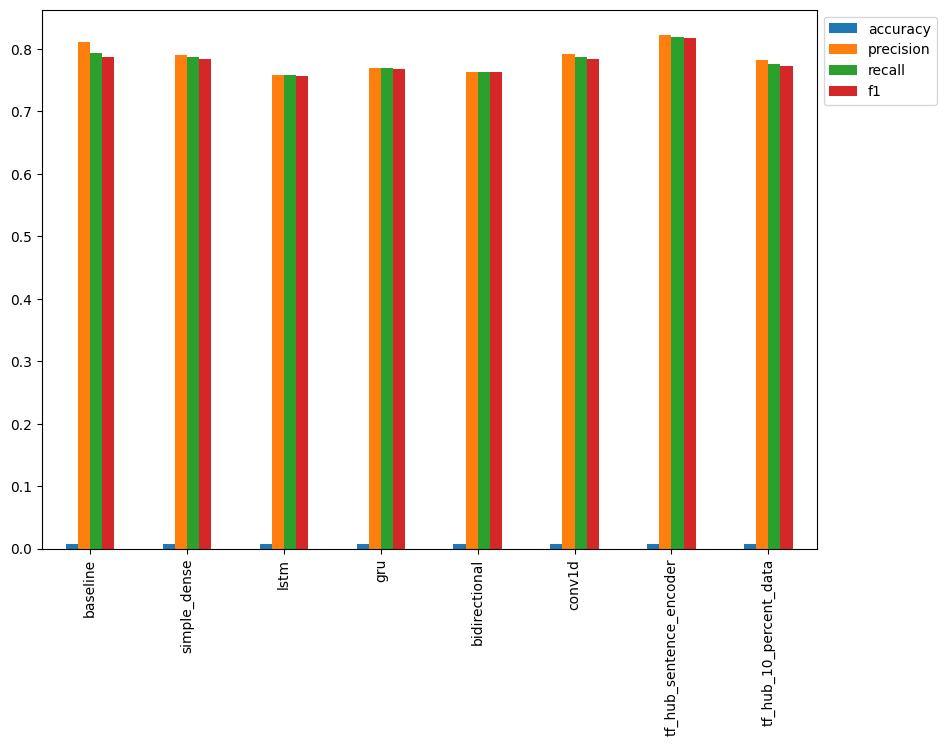

In [160]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

# New Section
Looks like our pretrained USE TensorFlow Hub models have the best performance, **even the one with only 10% of the training data seems to outperform the other models.** This goes to show the power of transfer learning.

How about we drill down and get the F1-score's of each model?

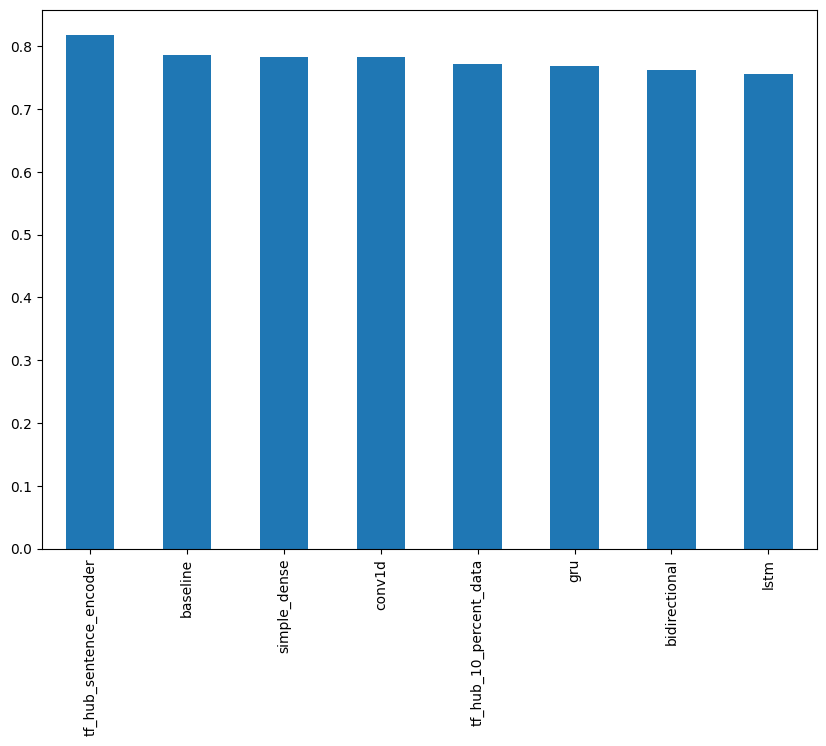

In [161]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

#Combining our models (Model Ensembling/Stacking)

**Many** production system use an ensemble (multiple different models combined) of models to make a prediction.
The main idea behind the model stacking is that if several uncorrelated models agree on a prediction, then the predition must be more robust that a prediction made by a singular model.
the keyword in the sentence above is **uncorrelated**#which is another way of saying, different types of models. For example, in our case, we might combine our baseline, our bidirectional model and our TensorFlow Hub USE model.

Although these models are all trained on the same data, they all have a different way of finding patterns.

If we were to use three similarly trained models, such as three LSTM models, the predictions they output will likely be very similar.

Think of it as trying to decide where to eat with your friends. If you all have similar tastes, you'll probably all pick the same restaurant. But if you've all got different tastes and still end up picking the same restaurant, the restaurant must be good.

Since we're working with a classification problem, there are a few of ways we can combine our models:



* **Averaging -** Take the output prediction probabilities of each model for each sample, combine them and then average them.
* **Majority vote (mode) -** Make class predictions with each of your models on all samples, the predicted class is the one in majority. For example, if three different models predict [1, 0, 1] respectively, the majority class is 1, therefore, that would be the predicted label.
* **Model stacking -** Take the outputs of each of your chosen models and use them as inputs to another model.

In [162]:
# Get mean pred probs for 3 models
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1) # get the prediction probabilities from baseline model
combined_pred_probs = baseline_preds + tf.squeeze(model_2_pred_probs) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3) # average and round the prediction probabilities to get prediction classes
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [170]:
# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 0.8083989501312336,
 'precision': 0.8181586807951526,
 'recall': 0.8083989501312336,
 'f1': 0.8047096864105232}

In [171]:
# Add our combined model's results to the results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results

In [174]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.786089,0.790328,0.786089,0.783297
lstm,0.757218,0.757615,0.757218,0.755595
gru,0.769029,0.769011,0.769029,0.767966
bidirectional,0.762467,0.762058,0.762467,0.761964
conv1d,0.786089,0.791621,0.786089,0.782857
tf_hub_sentence_encoder,0.818898,0.821443,0.818898,0.817356
tf_hub_10_percent_data,0.775591,0.781535,0.775591,0.771874
ensemble_results,0.808399,0.818159,0.808399,0.804710


Saving and loading a trained model
Although training time didn't take very long, it's good practice to save your trained models to avoid having to retrain them.

Saving your models also enables you to export them for use elsewhere outside of your notebooks, such as in a web application.

There are two main ways of saving a model in TensorFlow:

The HDF5 format.
The SavedModel format (default).
Let's take a look at both.

In [173]:
# Save TF Hub Sentence Encoder model to HDF5 format
#model_6.save("model_6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load model with custom Hub Layer (required with HDF5 format)
#loaded_model_6 = tf.keras.models.load_model("model_6.h5",  custom_objects={"KerasLayer": hub.KerasLayer})

#Finding the most wrong examples
We mentioned before that if many of our modelling experiments are returning similar results, despite using different kinds of models, it's a good idea to return to the data and inspect why this might be.

One of the best ways to inspect your data is to sort your model's predictions and find the samples it got most wrong, meaning, what predictions had a high prediction probability but turned out to be wrong.

Once again, visualization is your friend. Visualize, visualize, visualize.

To make things visual, let's take our best performing model's prediction probabilities and classes along with the validation samples (text and ground truth labels) and combine them in a pandas DataFrame.

If our best model still isn't perfect, what examples is it getting wrong?
Which ones are the most wrong?
Are there some labels which are wrong? E.g. the model gets it right but the ground truth label doesn't reflect this

#Making predictions on the test dataset
Alright we've seen how our model's perform on the validation set.

But how about the test dataset?

We don't have labels for the test dataset so we're going to have to make some predictions and inspect them for ourselves.

Let's write some code to make predictions on random samples from the test dataset and visualize them.



In [175]:
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 59ms/step
Pred: 1, Prob: 0.987056314945221
Text:
[August 06 2015 at 08:02PM] Three Israeli soldiers wounded in West Bank terrorist attack via http://t.co/6nDHERpBoT

----

1/1 [==============================] - 0s 37ms/step
Pred: 0, Prob: 0.42853742837905884
Text:
Pray for our Nation &amp; her troops that defend in her. May he continue his watch over those watch over us our first responders.

----

1/1 [==============================] - 0s 50ms/step
Pred: 1, Prob: 0.5209296941757202
Text:
She rose to her lofty position after being transported by accident to Oz in a hot air balloon during a snowstorm.

----

1/1 [==============================] - 0s 66ms/step
Pred: 0, Prob: 0.05965440720319748
Text:
my brother said he has a crush on a girl named Danielle ???????? OH GOD NO

----

1/1 [==============================] - 0s 44ms/step
Pred: 0, Prob: 0.06092871353030205
Text:
http://t.co/AyLATPE073 Reddit's new content policy goes into effect many ho


How do our model's predictions look on the test dataset?

It's important to do these kind of visualization checks as often as possible to get a glance of how your model performs on unseen data and subsequently how it might perform on the real test: Tweets from the wild.

#The speed/score tradeoff
One of the final tests we're going to do is to find the speed/score tradeoffs between our best model and baseline model.

Why is this important?

Although it can be tempting to just choose the best performing model you find through experimentation, this model might not actually work in a production setting.

Put it this way, imagine you're Twitter and receive 1 million Tweets per hour (this is a made up number, the actual number is much higher). And you're trying to build a diaster detection system to read Tweets and alert authorities with details about a diaster in close to real-time.

Compute power isn't free so you're limited to a single compute machine for the project. On that machine, one of your models makes 10,000 predictions per second at 80% accuracy where as another one of your models (a larger model) makes 100 predictions per second at 85% accuracy.

Which model do you choose?

Is the second model's performance boost worth missing out on the extra capacity?

Of course, there are many options you could try here, such as sending as many Tweets as possible to the first model and then sending the ones which the model is least certain of to the second model.

The point here is to illustrate the best model you find through experimentation, might not be the model you end up using in production.

To make this more concrete, let's write a function to take a model and a number of samples and time how long the given model takes to make predictions on those samples.

In [177]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.

  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find prediction time per sample
  return total_time, time_per_pred

In [178]:
# Calculate TF Hub Sentence Encoder prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 1s 20ms/step


(0.6803390650002257, 0.0008928334186354668)

In [179]:
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.0672140530004981, 8.820741863582428e-05)


It seems with our current hardware (in my case, I'm using a Google Colab notebook) our best performing model takes over 10x the time to make predictions as our baseline model.

Is that extra prediction time worth it?

Let's compare time per prediction versus our model's F1-scores.

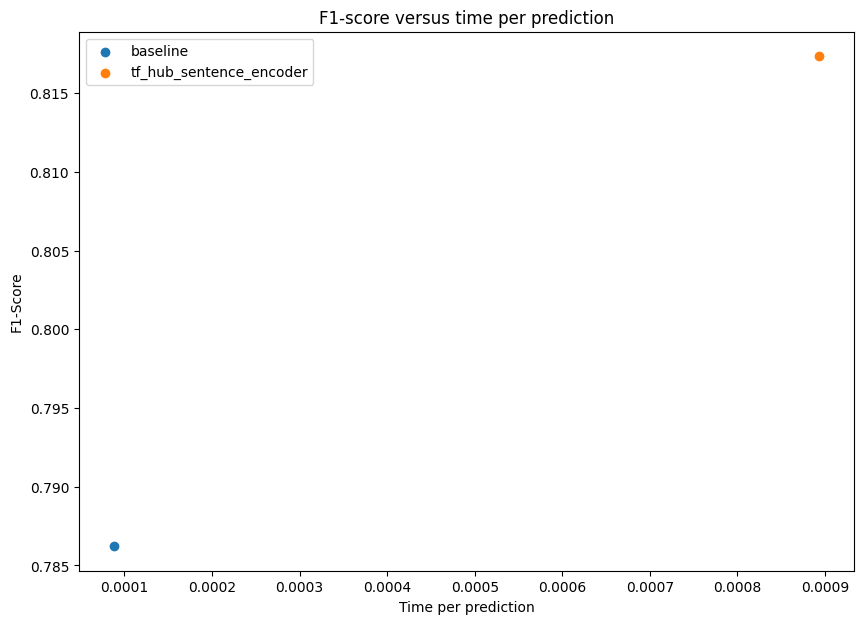

In [180]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");

Other topics worth looking into:
Attention mechanisms. These are a foundational component of the transformer architecture and also often add improvments to deep NLP models.
Transformer architectures. This model architecture has recently taken the NLP world by storm, achieving state of the art on many benchmarks. However, it does take a little more processing to get off the ground, the HuggingFace Models (formerly HuggingFace Transformers) library is probably your best quick start.
And now HuggingFace even have their own course on how their library works! I haven't done it but anything HuggingFace makes is world-class.
📖 Resource: See the full set of cours